## Exercise 06 : Scatter Matrix ##

## Imports ##

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## Task #
Помните, как мы пытались выяснить, есть ли корреляция между количеством посещений новостной ленты и средней разницей между первым коммитом и дедлайном лабораторной работы? Проблема в том, что коэффициент корреляции показывает наличие линейной зависимости между двумя переменными. А что если зависимость нелинейная? Как это увидеть? Правильно — построив графики!

Сделайте всё необходимое, чтобы создать график, похожий на Readme.

* создайте DataFrame, в котором для каждого пользователя из тестовой группы указана средняя разница, количество просмотров страниц и количество коммитов
* при вычислении средней разницы и количества коммитов не учитывайте project1
* количество коммитов берите из таблицы checker
* размер фигуры оставить прежним, размер шрифта и цветовую палитру можно выбрать любые
* размер точек — 200
* толщина линий диагональных графиков (kde) — 3
* в конце Jupyter Notebook создайте markdown‑ячейку и вставьте вопросы (ответьте на них, глядя только на графики):
  * «Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него мало коммитов?» Ответ: да или нет.
  * «Можно ли сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, маленькая средняя разница между первым коммитом и дедлайном?» Ответ: да или нет.
  * «Можно ли сказать, что много пользователей с небольшим количеством коммитов и мало с большим количеством коммитов?» Ответ: да или нет.
  * «Можно ли сказать, что много пользователей с маленькой средней разницей и мало с большой средней разницей?» Ответ: да или нет.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
users = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "user%"', conn)
test_group = users['uid'].unique()
test_group

array(['user_4', 'user_17', 'user_30', 'user_2', 'user_14', 'user_12',
       'user_8', 'user_29', 'user_22', 'user_16', 'user_0', 'user_19',
       'user_25', 'user_21', 'user_10', 'user_24', 'user_28', 'user_31',
       'user_3', 'user_26', 'user_15', 'user_13', 'user_20', 'user_6',
       'user_1', 'user_27', 'user_18', 'user_11', 'user_7', 'user_23'],
      dtype=object)

In [4]:
df = pd.read_sql('SELECT * FROM (SELECT * FROM checker WHERE labname != "project1") AS ch JOIN deadlines ON ch.labname = deadlines.labs', conn, parse_dates=['timestamp', 'deadlines'])
# df = pd.read_sql('SELECT * FROM checker WHERE labname != "project1"', conn, parse_dates=['timestamp'])
df = df[df['uid'].isin(test_group)]
df['avg_diff'] = df['timestamp'] - df['deadlines']
df['avg_diff'] = df['avg_diff'].apply(lambda x: x.total_seconds() / (24 * 60 * 60))
df.head()

,index,status,success,timestamp,numTrials,labname,uid,index,labs,deadlines,avg_diff
0,21,ready,0,2020-04-17 11:33:17.366400,1,laba04,user_4,0,laba04,2020-04-26 23:59:59,-9.518537
1,22,checking,0,2020-04-17 11:40:05.103116,2,laba04,user_4,0,laba04,2020-04-26 23:59:59,-9.513818
2,23,ready,0,2020-04-17 11:40:05.237273,2,laba04,user_4,0,laba04,2020-04-26 23:59:59,-9.513817
3,24,checking,0,2020-04-17 11:44:20.541374,3,laba04,user_4,0,laba04,2020-04-26 23:59:59,-9.510862
4,25,ready,1,2020-04-17 11:44:20.707058,3,laba04,user_4,0,laba04,2020-04-26 23:59:59,-9.510860


In [5]:
commits = df.groupby('uid').size().to_frame('num_commits').reset_index()
commits

,uid,num_commits
0,user_1,27
1,user_10,15
2,user_11,7
3,user_12,86
4,user_13,52
5,user_14,49
6,user_15,12
7,user_16,39
8,user_17,43
9,user_18,5


In [6]:
diffs = df[df['numTrials'] == 1][['uid', 'avg_diff']].groupby('uid').mean().reset_index()
diffs

,uid,avg_diff
0,user_1,-2.713319
1,user_10,-3.135096
2,user_11,-0.120174
3,user_12,-3.727112
4,user_13,-2.036592
5,user_14,-6.648696
6,user_15,-0.753871
7,user_16,-1.639008
8,user_17,-2.591980
9,user_18,-0.265329


In [7]:
views = pd.read_sql("SELECT * FROM pageviews", conn)
views = views[views['uid'].isin(test_group)].groupby('uid').size().to_frame('pageviews').reset_index()
views

,uid,pageviews
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [8]:
test_user_data = pd.merge(pd.merge(diffs, views, on='uid'), commits)
test_user_data

,uid,avg_diff,pageviews,num_commits
0,user_1,-2.713319,28,27
1,user_10,-3.135096,89,15
2,user_14,-6.648696,143,49
3,user_17,-2.591980,47,43
4,user_18,-0.265329,3,5
5,user_19,-4.143346,16,114
6,user_21,-4.004627,10,56
7,user_25,-3.894781,179,53
8,user_28,-3.616402,149,47
9,user_3,-4.405752,317,15


array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='pageviews', ylabel='avg_diff'>,
        <Axes: xlabel='num_commits', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='pageviews'>,
        <Axes: xlabel='pageviews', ylabel='pageviews'>,
        <Axes: xlabel='num_commits', ylabel='pageviews'>],
       [<Axes: xlabel='avg_diff', ylabel='num_commits'>,
        <Axes: xlabel='pageviews', ylabel='num_commits'>,
        <Axes: xlabel='num_commits', ylabel='num_commits'>]], dtype=object)

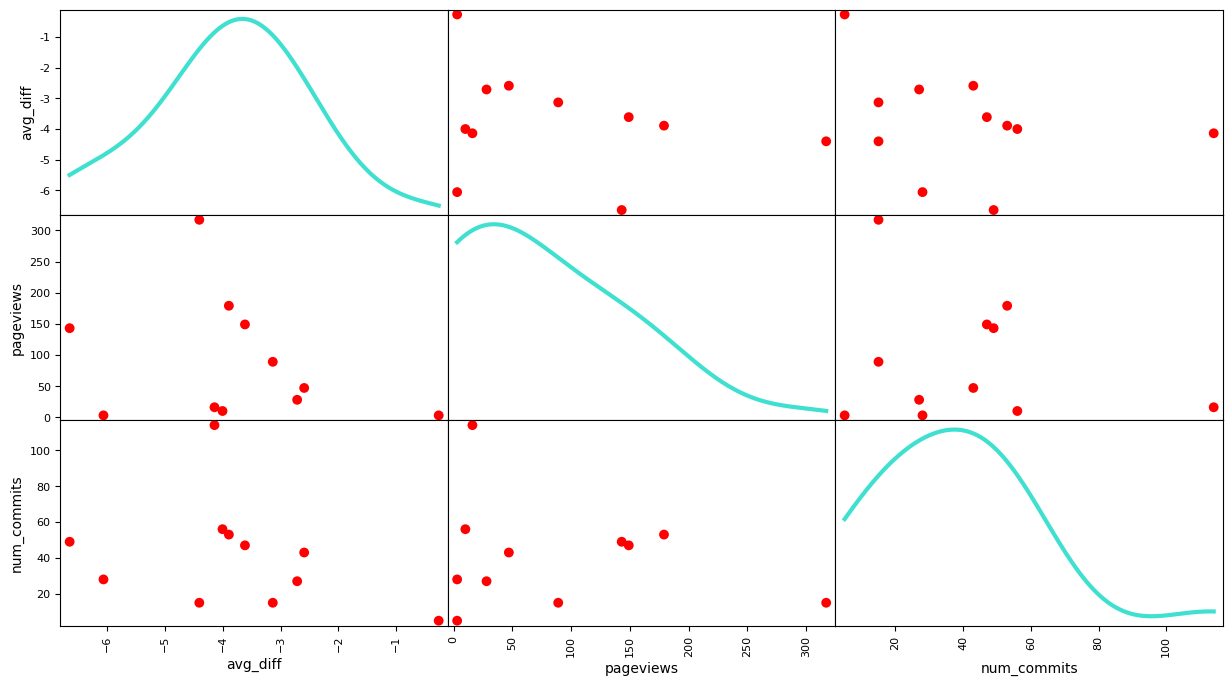

In [9]:
m = scatter_matrix(test_user_data, figsize=(15,8), diagonal='kde', s=200, c='red', alpha=1, density_kwds={'color': 'turquoise', 'linewidth': 3, 'alpha': 1})
m

In [10]:
conn.close()

  * «Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него мало коммитов?» Скорее да, чем нет.
  * «Можно ли сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, маленькая средняя разница между первым коммитом и дедлайном?» Скорее нет, чем да.
  * «Можно ли сказать, что много пользователей с небольшим количеством коммитов и мало с большим количеством коммитов?» Скорее да, чем нет
  * «Можно ли сказать, что много пользователей с маленькой средней разницей и мало с большой средней разницей?» Скорее нет, чем да.